In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn as sk
%matplotlib inline

In [2]:
df = pd.read_csv('final.txt', sep=',', header=None)
df.columns = ['percent_h2s', 'flow_rate','cost']
df

,percent_h2s,flow_rate,cost
0,2.0,4400,131.4
1,1.0,1500,54.1
2,9.0,4500,406.9
3,8.0,3250,308.0
4,0.0,4000,0.0
...,...,...,...
99,9.0,5000,395.6
100,10.0,1250,246.8
101,9.0,1750,246.1
102,10.0,2000,238.5


In [3]:
df.columns

Index(['percent_h2s', 'flow_rate', 'cost'], dtype='object')

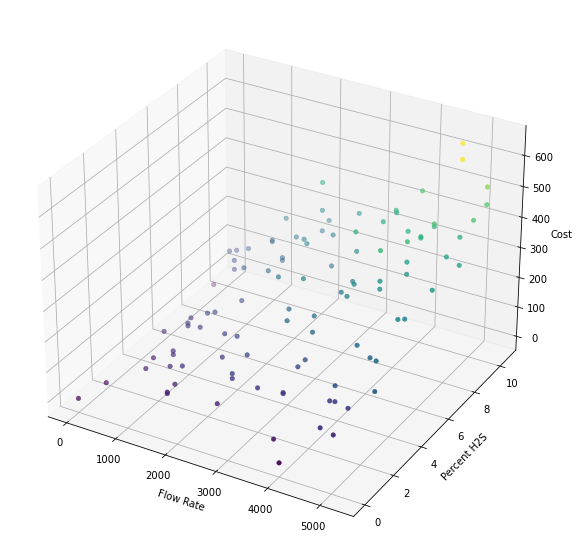

In [4]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Flow Rate")
ax.set_ylabel("Percent H2S")
ax.set_zlabel("Cost")
ax.scatter(df.flow_rate, df.percent_h2s, df.cost, c=df.cost, cmap='viridis', linewidth=0.5)
plt.show()

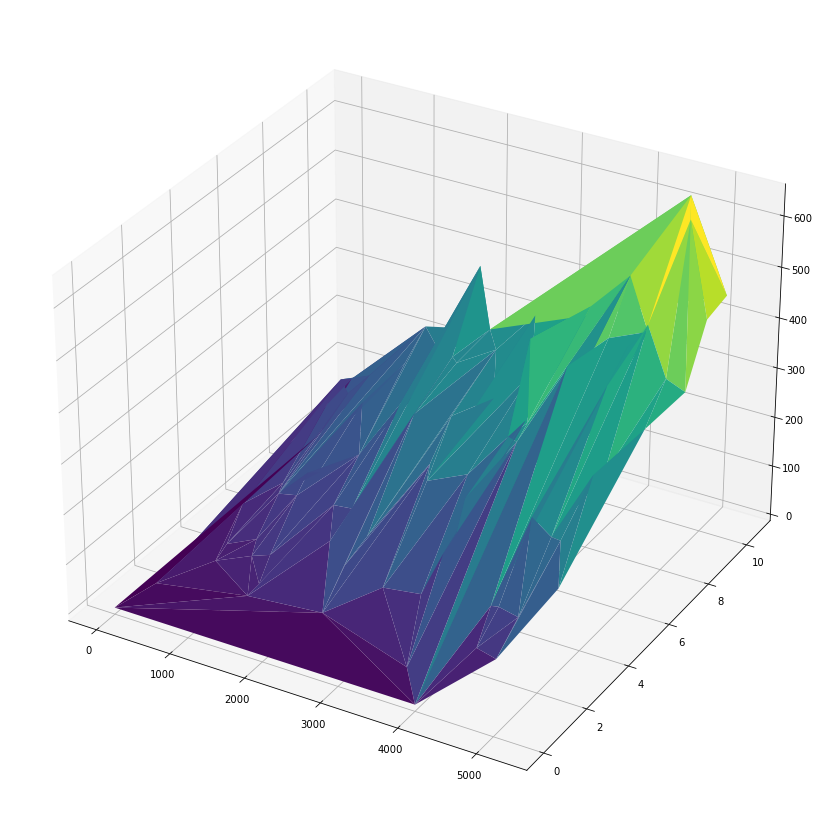

In [5]:
fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection='3d')
ax.plot_trisurf(df.flow_rate, df.percent_h2s, df.cost,
                cmap='viridis', edgecolor='none');

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
percent_h2s,104.0,5.653846,3.058552,0.0,3.000,6.0,8.125,10.5
flow_rate,104.0,2890.865385,1557.206305,0.0,1500.000,2875.0,4500.000,5250.0
cost,104.0,230.444231,141.370788,0.0,124.825,217.3,319.550,648.3


In [7]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [8]:
X_norm, mu, sigma = feature_normalize(df[['flow_rate', 'percent_h2s']])

In [9]:
df['flow_rate_normalized'] = X_norm[:,0]
df['percent_h2s_normalized'] = X_norm[:,1]
df[['flow_rate_normalized', 'percent_h2s_normalized']].describe().T

,count,mean,std,min,25%,50%,75%,max
flow_rate_normalized,104.0,-1.024821e-16,1.0,-1.856443,-0.89318,-0.010188,1.033347,1.514979
percent_h2s_normalized,104.0,-1.387779e-16,1.0,-1.848537,-0.86768,0.113176,0.807949,1.584460


In [10]:
df

,percent_h2s,flow_rate,cost,flow_rate_normalized,percent_h2s_normalized
0,2.0,4400,131.4,0.969130,-1.194633
1,1.0,1500,54.1,-0.893180,-1.521585
2,9.0,4500,406.9,1.033347,1.094032
3,8.0,3250,308.0,0.230628,0.767080
4,0.0,4000,0.0,0.712259,-1.848537
...,...,...,...,...,...
99,9.0,5000,395.6,1.354435,1.094032
100,10.0,1250,246.8,-1.053724,1.420984
101,9.0,1750,246.1,-0.732636,1.094032
102,10.0,2000,238.5,-0.572092,1.420984


In [11]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [12]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

In [13]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)),X_norm))
y = np.array(df.cost.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

In [14]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50

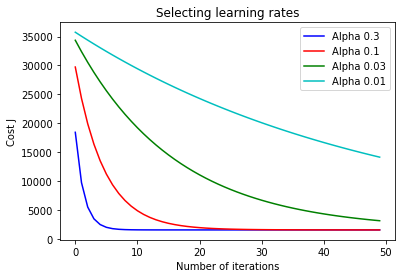

In [15]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [16]:
iterations = 250
alpha = 0.1
theta, _ = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

Theta found by gradient descent:
[[230.44423077]
 [ 81.77285407]
 [ 94.92117824]]


In [17]:
percent_h2s1= (10 - mu[1])/sigma[1]
flow_rate1  = (5250 - mu[0])/sigma[0]
#y_pred = theta[0] + theta[1]*percent_h2s1 + theta[2]*flow_rate1 
y_pred = theta[2] + theta[1]*percent_h2s1 + theta[0]*flow_rate1 

f'Cost of a plant with flow rate 5250, percent h2s 10: {y_pred[0]}$'

# 2.0	4400	131.4

'Cost of a plant with flow rate 5250, percent h2s 10: 560.2372289067998$'

<Figure size 1080x1080 with 0 Axes>

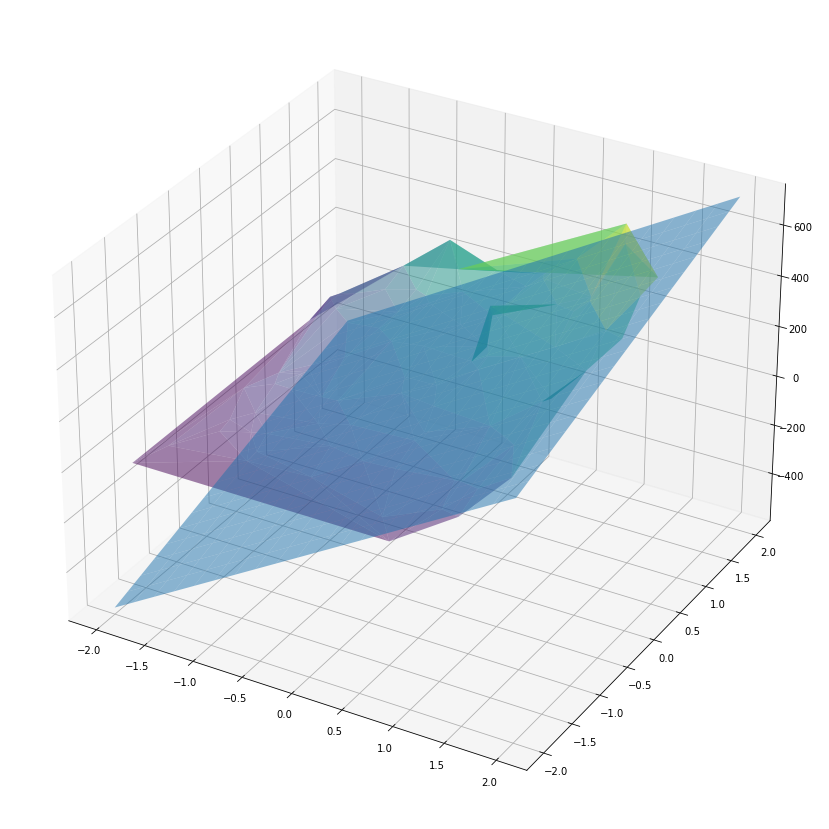

In [18]:


x = np.linspace(-2,2,20)
y = np.linspace(-2,2,20)

X,Y = np.meshgrid(x,y)
Z = 230.44423077*X + 94.92117824*Y + 81.77285407

fig = plt.figure(figsize=(15,15))
# ax = fig.(projection='3d')



fig1 = plt.figure(figsize=(15,15))

ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, Y, Z, alpha=0.5)
ax.plot_trisurf(df.flow_rate_normalized, df.percent_h2s_normalized, df.cost,
                cmap='viridis', edgecolor='none', alpha=0.5);

# ax.scatter(df.flow_rate_normalized, df.percent_h2s_normalized, df.cost, cmap='viridis', color='red', linewidth=0.5);

In [19]:
expected_cost = df.cost
expected_cost

0      131.4
1       54.1
2      406.9
3      308.0
4        0.0
       ...  
99     395.6
100    246.8
101    246.1
102    238.5
103    127.1
Name: cost, Length: 104, dtype: float64

In [20]:
predicted_cost = [None] * 104
    
for i in range(104):
    percent_h2s1 = (df.percent_h2s[i] - mu[1])/sigma[1]
    flow_rate1 = (df.flow_rate[i] - mu[0])/sigma[0]    
    temp = theta[2] + theta[1]*percent_h2s1 + theta[0]*flow_rate1
    
    #print(df.percent_h2s[i],percent_h2s1," ",df.flow_rate[i],flow_rate1," ",temp, df.cost[i])
    
    predicted_cost[i]=temp
    
predicted_cost

[array([220.5629746]),
 array([-235.33129495]),
 array([422.51216694]),
 array([210.794266]),
 array([107.8970964]),
 array([-178.75240216]),
 array([-169.43054483]),
 array([221.05488198]),
 array([305.30833693]),
 array([-303.10956237]),
 array([87.37586445]),
 array([486.24438993]),
 array([-208.59549144]),
 array([-182.79844659]),
 array([533.5014254]),
 array([114.11166795]),
 array([-420.31339238]),
 array([46.57935422]),
 array([395.77636343]),
 array([358.77994395]),
 array([-484.04561537]),
 array([213.65559809]),
 array([560.23722891]),
 array([-107.86684896]),
 array([-159.16992886]),
 array([-87.345617]),
 array([92.65167734]),
 array([469.76920241]),
 array([56.59401651]),
 array([-192.12030391]),
 array([453.29401488]),
 array([369.04055993]),
 array([235.36154239]),
 array([-229.1167234]),
 array([346.35080085]),
 array([-11.18425091]),
 array([336.09018487]),
 array([208.62573888]),
 array([312.46166714]),
 array([245.62215837]),
 array([375.25513148]),
 array([79.28377

In [21]:
#Calculating mean absolute error
temp=0
for i in range(104):
    temp+= abs(predicted_cost[i]-df.cost[i])

error=temp/104
error

array([173.90081466])

In [22]:
#Calculating mean absolute error by percentage
temp=0
for i in range(104):
    if(df.cost[i]==0):
        continue
    temp+=100*(   abs(predicted_cost[i]-df.cost[i])  /   (df.cost[i])  )

error=temp/104
error

array([142.7595455])